In [4]:
import datajoint as dj
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import stats

from locker import analysis as alys, colors, colordict
from locker import data

In [13]:
alys.FirstOrderSignificantPeaks() * data.Cells() & 'eod_coeff = 0 and abs(stimulus_coeff) = 1 and baseline_coeff=0 and refined=1'

restr = dj.AndList([
    ['cell_type="e-cell"', 'cell_type = "i-cell"'],
        "n_harmonics = 0",
        "am = 0",
        "contrast = 20.0",
         'refined=1',
        '(abs(delta_f) between 95 and 105)',
        'eod_coeff = 0 and abs(stimulus_coeff) = 1 and baseline_coeff=0'
]
)
temp = alys.FirstOrderSignificantPeaks() * data.Runs() * data.Cells() & restr
temp = temp.proj('vector_strength', 'frequency','cell_type', pos='delta_f > 0')

pd_pyr = pd.DataFrame(temp.fetch())
print(np.std(pd_pyr.loc[pd_pyr['cell_type']=='i-cell', 'vector_strength']))

0.02387193806297756


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


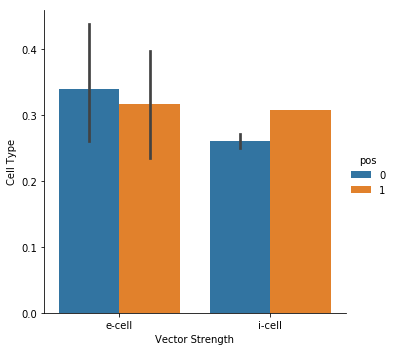

In [15]:
g = sns.catplot("cell_type", "vector_strength", hue="pos", data=pd_pyr, kind="bar")
g.set_ylabels('Cell Type')
g.set_xlabels('Vector Strength')
sns.despine()


In [16]:

pd_pyr.groupby(["cell_type", "pos"]).count()
f_tab, p_val = stats.ttest_ind(pd_pyr.loc[pd_pyr['cell_type']=='e-cell', 'vector_strength'], pd_pyr.loc[pd_pyr['cell_type']=='i-cell', 'vector_strength'])

print(p_val)

0.32834707808904995
